In [177]:
import pandas as pd
pd.reset_option("all")
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.options.display.max_seq_items = 2000
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt



As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.

: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



In [8]:
df = pd.read_csv('fotmob_odds_form_df.csv', index_col = [0])

In [9]:
col_names = df.columns
col_names

Index(['expected_goals_(xg)_diff', 'total_shots_diff', 'big_chances_diff',
       'big_chances_missed_diff', 'accurate_passes_diff',
       'accurate_passes_percentage_diff', 'fouls_committed_diff',
       'offsides_diff', 'corners_diff', 'shots_off_target_diff',
       'shots_on_target_diff', 'blocked_shots_diff', 'hit_woodwork_diff',
       'shots_inside_box_diff', 'shots_outside_box_diff', 'xg_open_play_diff',
       'xg_set_play_diff', 'xg_on_target_(xgot)_diff', 'passes_diff',
       'own_half_diff', 'opposition_half_diff', 'accurate_long_balls_diff',
       'accurate_long_balls_percentage_diff', 'accurate_crosses_diff',
       'accurate_crosses_percentage_diff', 'throws_diff', 'yellow_cards_diff',
       'red_cards_diff', 'tackles_won_diff', 'tackles_won_percentage_diff',
       'interceptions_diff', 'blocks_diff', 'clearances_diff',
       'keeper_saves_diff', 'duels_won_diff', 'ground_duels_won_diff',
       'ground_duels_won_percentage_diff', 'aerial_duels_won_diff',
       'a

In [10]:
threshold = 5
df_dropped = df.dropna(thresh=df.shape[1] - threshold + 1)
df = df.fillna(0)

In [11]:
qual_df = df.select_dtypes(include='object')

df = df.select_dtypes(include=['int', 'float'])

In [12]:
# non-penalty xg

df['np_xg_diff'] = df['expected_goals_(xg)_diff'] - df['xg_penalty_diff']
# efficiency metrics
df['efficiency_metric_diff'] = df['np_xg_diff'] / df['total_shots_diff']
# aggression factor
df['aggression_factor_diff'] = df['fouls_committed_diff'] + df['yellow_cards_diff'] + df['red_cards_diff']
# offensive/defensive balance
df['off_def_balance_diff'] = df['tackles_won_diff'] - df['successful_dribbles_diff']
# overall form difference
df['overall_form_diff'] = df['home_form_points_gained'] - df['away_form_points_gained']
# form efficiency
df['home_form_efficiency'] = df['home_form_goals_scored'] / df['home_form_goals_conceded']
df['away_form_efficiency'] = df['away_form_goals_scored'] / df['away_form_goals_conceded']
# shot quality
df['shot_quality'] = df['np_xg_diff'] / df['total_shots_diff']
# non-penalty xg conversion ratio
df['np_xg_conversion_ratio'] = df['score_diff'] / df['np_xg_diff']
# xg on target ratio
df['shot_quality_on_target'] = df['xg_on_target_(xgot)_diff'] / df['shots_on_target_diff']
# shot quality
df['xg_shot_quality'] = df['xg_on_target_(xgot)_diff'] / df['expected_goals_(xg)_diff']
# open-play xg efficiency
df['open_play_xg_efficiency'] = df['xg_open_play_diff'] / df['total_shots_diff']
# odds variability
df['odds_variability'] = df['std_0'] + df['std_1'] + df['std_2']
# predictability index
df['predictability_index'] = 1 / df['cv_odds']
# team discipline
df['discipline_score'] = df['fouls_committed_diff'] / (df['yellow_cards_diff'] + 3*df['red_cards_diff'])
# set-play efficiency
df['set_play_efficiency'] = df['xg_set_play_diff'] / (df['corners_diff'] + df['accurate_long_balls_diff'])
# possession efficiency
df['possession_efficiency'] = df['np_xg_diff'] / df['posession_diff']
# goal conversion ratio
df['goal_conversion_ratio'] = df['score_diff'] / df['expected_goals_(xg)_diff']
# possession conversion
df['possession_conversion'] = df['np_xg_diff'] / df['posession_diff']
# possession territory
df['possession_territory'] = df['own_half_diff'] / df['opposition_half_diff']
# possession effectiveness
df['possession_effectiveness'] = df['big_chances_diff'] / df['posession_diff']
# possession discipline
df['possession_discipline'] = df['fouls_committed_diff'] / df['posession_diff']
# pass efficiency
df['pass_efficiency'] = df['total_shots_diff'] / df['passes_diff']
# xg per pass
df['xg_per_pass'] = df['np_xg_diff'] / df['passes_diff']
# crossing efficiency
df['crossing_efficiency'] = df['shots_on_target_diff'] / df['accurate_crosses_diff']
# crossing xg efficiency
df['crossing_xg_efficiency'] = df['np_xg_diff'] / df['accurate_crosses_diff']
# opposition half pass efficiency
df['opposition_half_pass_efficiency'] = df['total_shots_diff'] / df['opposition_half_diff']
# big chance creation
df['big_chance_creation'] = df['big_chances_diff']/df['total_shots_diff']
df = df.replace([np.inf, -np.inf], np.nan)

# handle nan values (use an appropriate strategy here, fill with 0 as an example)
df = df.fillna(0)

In [78]:
df.columns

Index(['expected_goals_(xg)_diff', 'total_shots_diff', 'big_chances_diff',
       'big_chances_missed_diff', 'accurate_passes_diff',
       'accurate_passes_percentage_diff', 'fouls_committed_diff',
       'offsides_diff', 'corners_diff', 'shots_off_target_diff',
       'shots_on_target_diff', 'blocked_shots_diff', 'hit_woodwork_diff',
       'shots_inside_box_diff', 'shots_outside_box_diff', 'xg_open_play_diff',
       'xg_set_play_diff', 'xg_on_target_(xgot)_diff', 'passes_diff',
       'own_half_diff', 'opposition_half_diff', 'accurate_long_balls_diff',
       'accurate_long_balls_percentage_diff', 'accurate_crosses_diff',
       'accurate_crosses_percentage_diff', 'throws_diff', 'yellow_cards_diff',
       'red_cards_diff', 'tackles_won_diff', 'tackles_won_percentage_diff',
       'interceptions_diff', 'blocks_diff', 'clearances_diff',
       'keeper_saves_diff', 'duels_won_diff', 'ground_duels_won_diff',
       'ground_duels_won_percentage_diff', 'aerial_duels_won_diff',
       'a

In [168]:
fdf = df[['total_shots_diff','big_chances_diff','shots_on_target_diff','xg_on_target_(xgot)_diff','passes_diff','score_diff', 'posession_diff',
        'std_0', 'std_1', 'std_2','skew_0', 'skew_1', 'skew_2', 'kurtosis_0', 'kurtosis_1', 'kurtosis_2','mean_0', 'mean_1', 'mean_2',
        'cv_odds', 'target','home_form_goal_difference', 'away_form_goal_difference', 'home_form_win_ratio','away_form_win_ratio',
        'home_form_win_streak','away_form_win_streak','home_form_scoring_ratio','away_form_scoring_ratio','np_xg_diff',
        'efficiency_metric_diff','shot_quality', 'np_xg_conversion_ratio','shot_quality_on_target', 'xg_shot_quality', 'open_play_xg_efficiency',
          'odds_variability', 'predictability_index','possession_efficiency', 'overall_form_diff']]

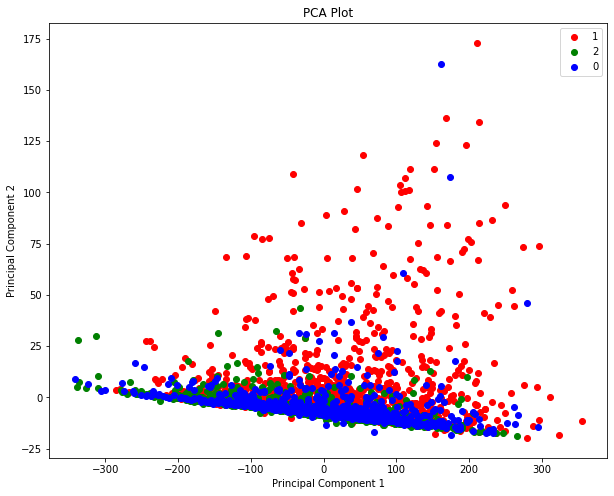

In [169]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming your DataFrame is called 'df'
# Extract the features and target
features = fdf.drop('target', axis=1).values
target = fdf['target'].values

# Perform PCA
pca = PCA(n_components=2)  # Set the desired number of components (2 in this case)
components = pca.fit_transform(features)

# Create a new DataFrame with the principal components and the target
pca_df = pd.DataFrame(data=components, columns=['PC1', 'PC2'])
pca_df['target'] = target

# Plot the results
plt.figure(figsize=(10, 8))
targets = pd.unique(target)  # Get unique target values
colors = ['r', 'g', 'b']  # Set colors for each target (you can customize this as needed)

for target, color in zip(targets, colors):
    indices = pca_df['target'] == target
    plt.scatter(pca_df.loc[indices, 'PC1'], pca_df.loc[indices, 'PC2'], c=color, label=target)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('PCA Plot')
plt.show()


In [98]:
def plot_evaluation_graphs(column_name, target):

    plt.figure(figsize=(10, 5))
    sns.boxplot(x=target, y=column_name, data=df, palette='Set2')
    plt.title('Relationship between {} and Target'.format(column_name))
    plt.show()

    plt.figure(figsize=(10, 5))
    sns.kdeplot(data=df, x=column_name, hue=target, fill=True, palette = 'Set2')
    plt.title('Distribution of {} for each class'.format(column_name))
    plt.show()

    plt.figure(figsize=(10, 5))
    sns.violinplot(x=target, y=column_name, data=df, palette='Set2')
    plt.title('Correlation between {} and Target'.format(column_name))
    plt.show()
    
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x=column_name, y=target, data=df, palette='Set2', hue="target", alpha=0.7)
    plt.title('Relationship between {} and Target (Scatter Plot)'.format(column_name))
    plt.show()

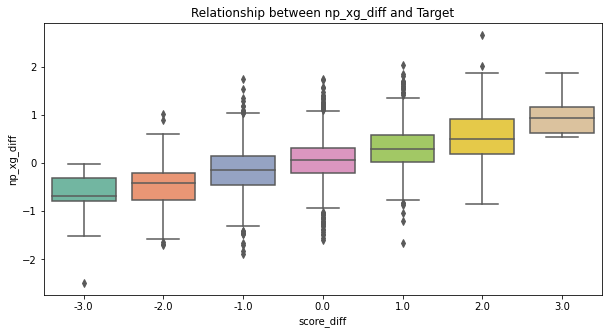

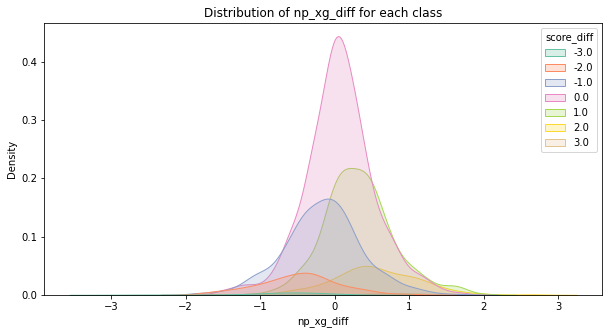

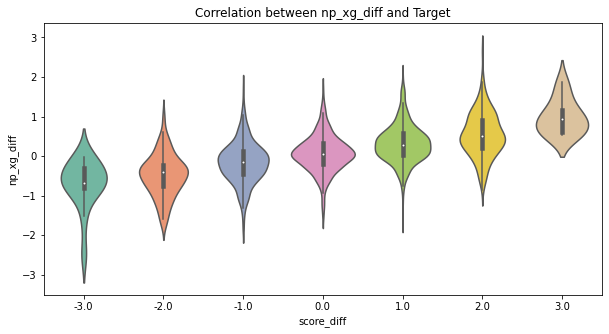

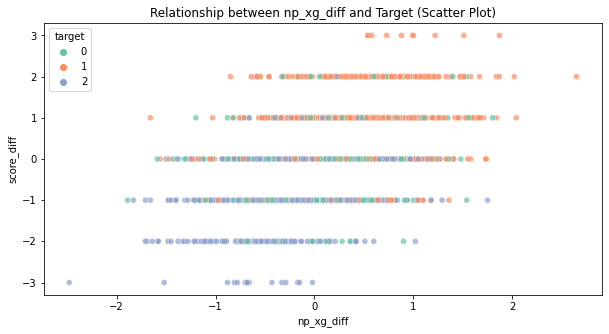

In [100]:
plot_evaluation_graphs('np_xg_diff', 'score_diff')

In [181]:
diffs

array([ 0.16200212, -0.02197826, -0.21187161])

Epoch 1/10
58/58 [==============================] - 0s 4ms/step - loss: 1.1170 - accuracy: 0.3842 - val_loss: 1.0221 - val_accuracy: 0.4734
Epoch 2/10
58/58 [==============================] - 0s 3ms/step - loss: 0.9941 - accuracy: 0.5062 - val_loss: 0.9391 - val_accuracy: 0.5582
Epoch 3/10
58/58 [==============================] - 0s 3ms/step - loss: 0.9290 - accuracy: 0.5469 - val_loss: 0.8995 - val_accuracy: 0.5734
Epoch 4/10
58/58 [==============================] - 0s 3ms/step - loss: 0.8908 - accuracy: 0.5670 - val_loss: 0.8824 - val_accuracy: 0.5823
Epoch 5/10
58/58 [==============================] - 0s 3ms/step - loss: 0.8646 - accuracy: 0.5871 - val_loss: 0.8740 - val_accuracy: 0.5899
Epoch 6/10
58/58 [==============================] - 0s 3ms/step - loss: 0.8450 - accuracy: 0.5941 - val_loss: 0.8684 - val_accuracy: 0.5873
Epoch 7/10
58/58 [==============================] - 0s 3ms/step - loss: 0.8295 - accuracy: 0.6082 - val_loss: 0.8691 - val_accuracy: 0.5899
Epoch 8/10
58/58 [==

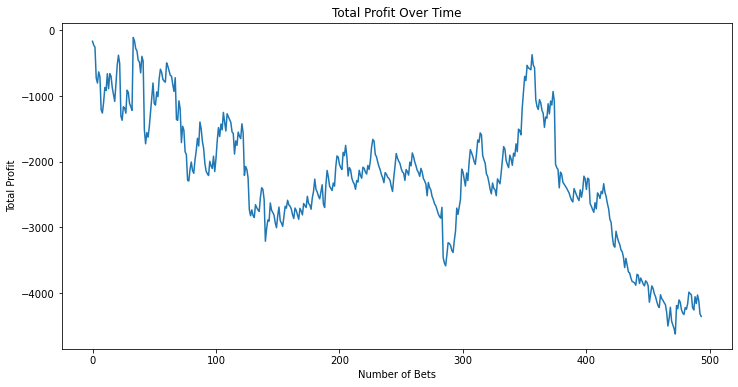

In [182]:
feature_cols = [col for col in df.columns if col != 'target']
X = df[feature_cols]
y = df['target']

X_train_df, X_test_df, y_train_series, y_test_series = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_df)
X_test = scaler.transform(X_test_df)

encoder = OneHotEncoder()
y_train = encoder.fit_transform(y_train_series.values.reshape(-1, 1)).toarray()
y_test = encoder.transform(y_test_series.values.reshape(-1, 1)).toarray()

model = Sequential()
model.add(Dense(8, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

def predict_percentages(model, X):
    pred = model.predict(X)
    return pred / 1

predictions = predict_percentages(model, X_test)

profits = []
total_profit = 0
bets_odds = []
bets_count = 0
actual_outcomes = np.argmax(y_test, axis=1)
alpha = np.array([0.057, 0.034, 0.037])
# alpha = np.array([0.,0.,0.])

bankroll = 10000
kelly_fraction = 0.025
outcomes = ["draw", "home win", "away win"]

bets_won = []
bets_lost = []

odds_won = []
odds_lost = []

for i in range(len(X_test_df)):
    idx = X_test_df.index[i]
    odds = df.loc[idx, ['mean_0', 'mean_1', 'mean_2']].values
    pred_probs = predictions[i]
    implied_probs = 1 / odds

    diffs = pred_probs - implied_probs
    j = np.argmax(diffs)

    if diffs[j] > alpha[j]:  # if the largest difference is greater than alpha
        bet_fraction = kelly_fraction * (pred_probs[j] * odds[j] - (1 - pred_probs[j])) / (odds[j] - 1)
        bet_amount = bet_fraction * bankroll
        bets_odds.append(odds[j])
        bets_count += 1
        actual_outcome = actual_outcomes[i]

        if actual_outcome == j:
            profit = (odds[j] - 1) * bet_amount
            bankroll += profit
            bets_won.append(bet_amount)
            odds_won.append(odds[j])
            print(f"W - game:{i+1} outcome: {outcomes[actual_outcome]} - bet: {outcomes[j]} - pred prob: {pred_probs[j]:.2f} - given prob: {implied_probs[j]:.2f} - odds {odds[j]} - bet size: {bet_amount:.2f}: profit/loss: {profit:.2f}")
        else:
            profit = -bet_amount
            bankroll += profit
            bets_lost.append(bet_amount)
            odds_lost.append(odds[j])
            print(f"L - game:{i+1} outcome: {outcomes[actual_outcome]} - bet: {outcomes[j]} - pred prob: {pred_probs[j]:.2f} - given prob: {implied_probs[j]:.2f} - odds {odds[j]} - bet size: {bet_amount:.2f}: profit/loss: {profit:.2f}")

        profits.append(profit)
        total_profit += profit

print('Total profit:', total_profit)
print('Average bet odds:', np.mean(bets_odds))
print('Number of bets placed:', bets_count)
print('Average bet size when won:', np.mean(bets_won))
print('Average bet size when lost:', np.mean(bets_lost))
print('Average odds when won:', np.mean(odds_won))
print('Average odds when lost:', np.mean(odds_lost))

plt.figure(figsize=(12,6))
plt.plot(np.cumsum(profits))
plt.title('Total Profit Over Time')
plt.xlabel('Number of Bets')
plt.ylabel('Total Profit')
plt.show()